## Importand Imports 

In [209]:
import pandas as pd
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows',None)

## Reading Data File 

In [210]:
data=pd.read_csv('transactions.csv',index_col='date',parse_dates=True)
data.head()

,transaction_id,product_id,category
date,,,
2017-10-01,1,662685,Casual Dress
2017-10-01,2,154881,Casual Dress
2017-10-01,3,220036,Casual Dress
2017-10-01,4,220036,Casual Dress
2017-10-01,5,950839,Pullover Sweater


##### checking te numner of unique category and Product Id

In [211]:
unique_cat=data['category'].unique()
productid=data['product_id'].unique()
unique_cat, len(productid)

(array(['Casual Dress', 'Pullover Sweater', 'Sleeveless Blouse',
        'Fleece Jacket'], dtype=object), 1121600)

### Information Of Data

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1203105 entries, 2017-10-01 to 2018-09-30
Data columns (total 3 columns):
transaction_id    1203105 non-null int64
product_id        1203105 non-null int64
category          1203105 non-null object
dtypes: int64(2), object(1)
memory usage: 36.7+ MB


###### since the product Id and transection id have lots of entry and they are not providing information about sell of the productid should drop both columns 

In [213]:
data.drop(['transaction_id','product_id'],axis=1, inplace=True)
data.head()

,category
date,
2017-10-01,Casual Dress
2017-10-01,Casual Dress
2017-10-01,Casual Dress
2017-10-01,Casual Dress
2017-10-01,Pullover Sweater


#### since there is value missing for the Fleece Jacket so add the 5 entry of Fleece Jacket to make the graph smooth

In [214]:
# df1=data.loc['2018-04-10']
df2=pd.DataFrame([['2018-04-10','Fleece Jacket'] for i in range(5)],columns=['date', 'category'])
df2.index=pd.to_datetime(df2['date'])
df2.drop(['date'],axis=1,inplace=True)
df2

,category
date,
2018-04-10,Fleece Jacket
2018-04-10,Fleece Jacket
2018-04-10,Fleece Jacket
2018-04-10,Fleece Jacket
2018-04-10,Fleece Jacket


In [215]:
df3=[df2,data]
data=pd.concat(df3)
data=data.sort_index()
data.shape

(1203110, 1)

#### Counting the value for each date for the each category 

In [216]:
df=data.groupby(['date', 'category']).size()
df

date        category         
2017-10-01  Casual Dress         1923
            Fleece Jacket          18
            Pullover Sweater      964
            Sleeveless Blouse     428
2017-10-02  Casual Dress         1586
            Fleece Jacket          27
            Pullover Sweater     1098
            Sleeveless Blouse     401
2017-10-03  Casual Dress         1499
            Fleece Jacket          34
            Pullover Sweater     1028
            Sleeveless Blouse     333
2017-10-04  Casual Dress         1720
            Fleece Jacket          18
            Pullover Sweater     1001
            Sleeveless Blouse     336
2017-10-05  Casual Dress         1754
            Fleece Jacket          48
            Pullover Sweater     1024
            Sleeveless Blouse     386
2017-10-06  Casual Dress         1947
            Fleece Jacket          30
            Pullover Sweater     1167
            Sleeveless Blouse     394
2017-10-07  Casual Dress         2807
            Fleece J

### Removing the duplicate index and keep one entry corresponding to one day so that it would be easy to plot the categorical value with date 

In [217]:
data = data[~data.index.duplicated(keep='first')]
data.head()

,category
date,
2017-10-01,Casual Dress
2017-10-02,Sleeveless Blouse
2017-10-03,Casual Dress
2017-10-04,Casual Dress
2017-10-05,Pullover Sweater


#### Adding for columns for categorical value to the dateset

In [218]:
data['Casual Dress']=data.apply(lambda _: '', axis=1)
data['Fleece Jacket']=data.apply(lambda _: '', axis=1)
data['Pullover Sweater']=data.apply(lambda _: '', axis=1)
data['Sleeveless Blouse']=data.apply(lambda _: '', axis=1)
data.head()

,category,Casual Dress,Fleece Jacket,Pullover Sweater,Sleeveless Blouse
date,,,,,
2017-10-01,Casual Dress,,,,
2017-10-02,Sleeveless Blouse,,,,
2017-10-03,Casual Dress,,,,
2017-10-04,Casual Dress,,,,
2017-10-05,Pullover Sweater,,,,


In [219]:
data.shape

(365, 5)

#### Add the value corresponding to number of product sold per day to the dataset

In [220]:
for i in range(len(df)):
    data.iloc[i//4,i%4+1]=df[i]
#     print(i, i%4+1)
data.head(100)

,category,Casual Dress,Fleece Jacket,Pullover Sweater,Sleeveless Blouse
date,,,,,
2017-10-01,Casual Dress,1923,18,964,428
2017-10-02,Sleeveless Blouse,1586,27,1098,401
2017-10-03,Casual Dress,1499,34,1028,333
2017-10-04,Casual Dress,1720,18,1001,336
2017-10-05,Pullover Sweater,1754,48,1024,386
2017-10-06,Casual Dress,1947,30,1167,394
2017-10-07,Casual Dress,2807,26,1520,612
2017-10-08,Casual Dress,2743,30,1592,617
2017-10-09,Pullover Sweater,2938,26,1532,566


####  Drop the category columns because we have made four new columns corresponding to the each category along with there frequncy 

In [221]:
data.drop(['category'], inplace=True, axis=1)

In [222]:
data.iloc[364,3]=1100
data.shape

(365, 4)

In [223]:
data.head()

,Casual Dress,Fleece Jacket,Pullover Sweater,Sleeveless Blouse
date,,,,
2017-10-01,1923,18,964,428
2017-10-02,1586,27,1098,401
2017-10-03,1499,34,1028,333
2017-10-04,1720,18,1001,336
2017-10-05,1754,48,1024,386


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-10-01 to 2018-09-30
Data columns (total 4 columns):
Casual Dress         365 non-null int64
Fleece Jacket        365 non-null int64
Pullover Sweater     365 non-null int64
Sleeveless Blouse    365 non-null int64
dtypes: int64(4)
memory usage: 14.3 KB


### data seasonal pattern for each product throughout year plot

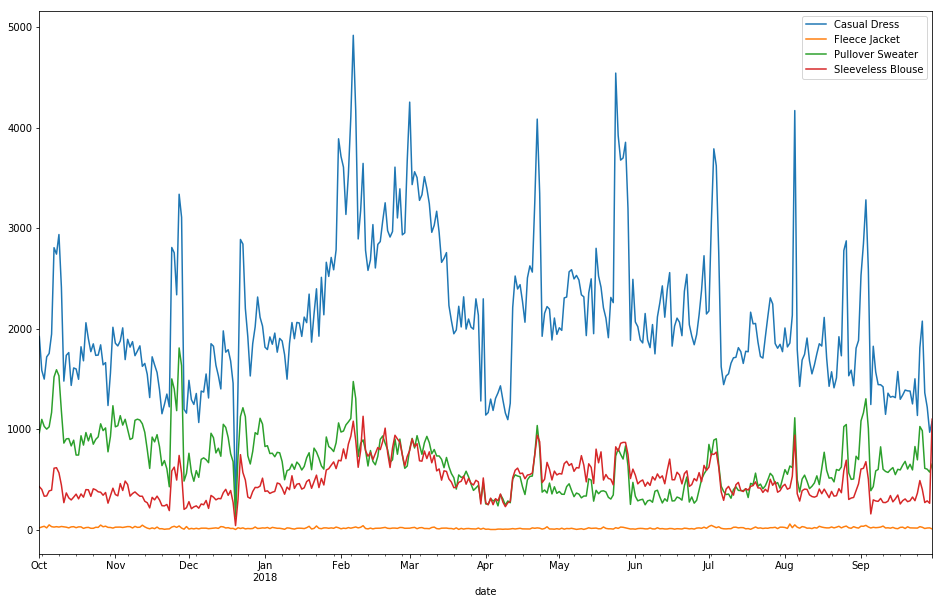

In [225]:
data['Casual Dress'].plot(legend="casual dress", figsize=(16,10))
data['Fleece Jacket'].plot(legend="fleece_jacket")
data['Pullover Sweater'].plot(legend="Pullover_sweater")
data['Sleeveless Blouse'].plot(legend="sleeveless_blouse");

#### For the Pullover Sweater there is increse in the after august month and it continue till fabruary. For Sleeveless Blouse there is increse in sell for the month of fabruary april. For the casual dress there is increse in sell from mid december to mid april. Thoughout the year selling for casual dress is not consistent.

#### From the below scatter plot we can clearly see that there is very high relation in casual dress and sleevless blouse selling

In [226]:
from pandas.plotting import scatter_matrix

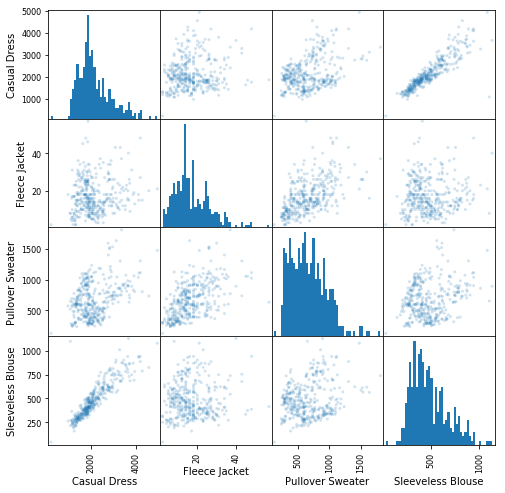

In [227]:
scatter_matrix(data,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [228]:
# data['Casual Dress'].hist(bins=100,label="casual dress", figsize=(16,8),alpha=0.5)
# data['Fleece Jacket'].hist(bins=100,label="fleece_jacket",alpha=0.5)
# data['Pullover Sweater'].hist(bins=100,label="Pullover_sweater",alpha=0.5)
# data['Sleeveless Blouse'].hist(bins=100,label="sleeveless_blouse",alpha=0.5);
# plt.legend();

In [229]:
# data.head()

In [230]:
data.head(1),data.tail(1)

(            Casual Dress  Fleece Jacket  Pullover Sweater  Sleeveless Blouse
 date                                                                        
 2017-10-01          1923             18               964                428,
             Casual Dress  Fleece Jacket  Pullover Sweater  Sleeveless Blouse
 date                                                                        
 2018-09-30          1076              8               653               1100)

In [231]:
# data1=data['2018-9']
# data1

In [232]:
# data1=data1/data1.sum(axis=0)
# data1

### Representing season by the Month and calculating range[0,1] for each category for each season

In [242]:
k=0
data2=[]
for i in range(12):
    if(i==3):
        k=1
    data1=data[f'{(2017+k)}-{1+(9+i)%12}']
    data1=data1/data1.sum(axis=0)
    data2.append(data1)
#     data[f'{(2017+k)}-{(10+i)%12}']=data1
#     print(data[f'{(2017+k)}-{(10+i)%12}'])
data3=pd.concat(data2)
data3

,Casual Dress,Fleece Jacket,Pullover Sweater,Sleeveless Blouse
date,,,,
2017-10-01,0.033759,0.022556,0.030859,0.036146
2017-10-02,0.027843,0.033835,0.035148,0.033865
2017-10-03,0.026315,0.042607,0.032908,0.028123
2017-10-04,0.030195,0.022556,0.032043,0.028376
2017-10-05,0.030792,0.060150,0.032780,0.032599
2017-10-06,0.034180,0.037594,0.037357,0.033274
2017-10-07,0.049278,0.032581,0.048657,0.051685
2017-10-08,0.048154,0.037594,0.050962,0.052107
2017-10-09,0.051577,0.032581,0.049041,0.047800


In [243]:
data3.shape

(365, 4)

In [244]:
data3.columns=['Casual Dress range', 'Fleece Jacket range', 'Pullover Sweater range',
       'Sleeveless Blouse range']

#### Adding two datasets respectively range dataset and frequency dataset to make final dataset 

In [245]:
data4=[data3,data]
data5=pd.concat(data4,axis=1)
data5

,Casual Dress range,Fleece Jacket range,Pullover Sweater range,Sleeveless Blouse range,Casual Dress,Fleece Jacket,Pullover Sweater,Sleeveless Blouse
date,,,,,,,,
2017-10-01,0.033759,0.022556,0.030859,0.036146,1923,18,964,428
2017-10-02,0.027843,0.033835,0.035148,0.033865,1586,27,1098,401
2017-10-03,0.026315,0.042607,0.032908,0.028123,1499,34,1028,333
2017-10-04,0.030195,0.022556,0.032043,0.028376,1720,18,1001,336
2017-10-05,0.030792,0.060150,0.032780,0.032599,1754,48,1024,386
2017-10-06,0.034180,0.037594,0.037357,0.033274,1947,30,1167,394
2017-10-07,0.049278,0.032581,0.048657,0.051685,2807,26,1520,612
2017-10-08,0.048154,0.037594,0.050962,0.052107,2743,30,1592,617
2017-10-09,0.051577,0.032581,0.049041,0.047800,2938,26,1532,566


In [246]:
data5.to_csv('Transection.csv')